# Vi laster inn data fra internett

Vi kan finne datafiler lagt ut på nettet. Disse kan vi laste inn i Python på en elegant måte ved å bruke pandas. Vi viser ved hjelp av en del eksempler. 

### Eksempel 1

Filen https://vincentarelbundock.github.io/Rdatasets/csv/quantreg/gasprice.csv innhol- der tidsserie for ukentlige bensinpriser i USA i perioden 1990:8-2003:26

a) Lag en grafisk framstilling av hele tidsserien.

b) Lag en grafiske gramstilling der du kun ser på årene 2000-2003.

#### Løsning:

In [1]:
import pandas as pd             # For å lese og behandle CSV-filer
import matplotlib.pyplot as plt # For plotting

url = "https://vincentarelbundock.github.io/Rdatasets/csv/quantreg/gasprice.csv"
# Vi leser inn data fra URLen og lagrer det i en dataframe som vi kaller df:
df = pd.read_csv(url, index_col=0)
df

,time,value
1,1990.134615,126.6
2,1990.153846,127.2
3,1990.173077,132.1
4,1990.192308,133.3
5,1990.211538,133.9
...,...,...
691,2003.403846,157.9
692,2003.423077,160.4
693,2003.442308,159.1
694,2003.461538,160.9


Vi kan nå plotte disse tallene ved å bruke time på x-aksen og value på y-aksen. Dette kan gjøres ved å bruke plt.plot(). Vi kan også bruke en egen plotte-metode på datarammen df som pandas gir oss. Vi viser begge metodene. 

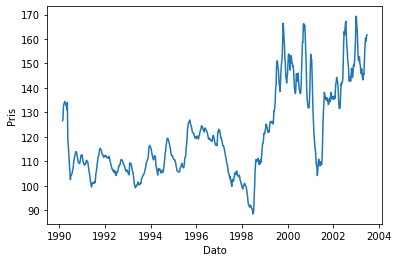

In [2]:
# Metode 1

x = df["time"] # x er en liste med datoer
y = df["value"] # y er en liste med priser

plt.plot(x, y)
plt.xlabel("Dato")
plt.ylabel("Pris")
plt.show()


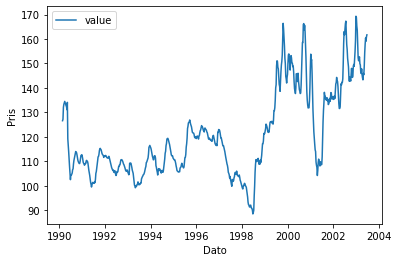

In [3]:
# Metode 2

df.plot("time", "value")
plt.xlabel("Dato")
plt.ylabel("Pris")
plt.show()

Vi kan finne gjennomsnittsprisen for disse årene ved å bruke pandas mean-metode på datarammen. 


In [4]:
df["value"].mean()

120.7546762589928

Vi kunne også funnet gjennomsnittsprisen for årene 2000-2003:

In [5]:
# Vi lager en ny dataramme som kun har med de rader vi ønsker å behandle:
D = df[df["time"]>=2000]
D

,time,value
514,2000.000000,145.6
515,2000.019231,150.2
516,2000.038462,153.5
517,2000.057692,153.9
518,2000.076923,152.5
...,...,...
691,2003.403846,157.9
692,2003.423077,160.4
693,2003.442308,159.1
694,2003.461538,160.9


In [6]:
D["value"].mean()

141.87417582417586

Vi ser at gjennomsnittsprisen i perioden 2000-2003 er 141.87 dollar. 

### Eksempel 2

Filen https://vincentarelbundock.github.io/Rdatasets/csv/datasets/nottem.csv har data fra Nottingham slott. Den har to kolonner. Den første er tiden (i år) og den andre er temperaturen målt i Fahrenheit. 

Vi ønsker å plotte temperaturen målt i grader Celsius som funksjon av tiden. 

Vi bruker da følgende formel for å regne om fra Fahrenheit til Celsius:

$$C = \frac{5\cdot (F-32)}{9} $$


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Vi lager en dataramme med tallene fra filen:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/nottem.csv"
df = pd.read_csv(url, index_col=0)
df


,time,value
1,1920.000000,40.6
2,1920.083333,40.8
3,1920.166667,44.4
4,1920.250000,46.7
5,1920.333333,54.1
...,...,...
236,1939.583333,61.8
237,1939.666667,58.2
238,1939.750000,46.7
239,1939.833333,46.6


In [8]:
# Vi legger til kolonnen med temperaturen i Celsius. 

df["temperatur"] = 5*(df["value"]- 32)/9
df

,time,value,temperatur
1,1920.000000,40.6,4.777778
2,1920.083333,40.8,4.888889
3,1920.166667,44.4,6.888889
4,1920.250000,46.7,8.166667
5,1920.333333,54.1,12.277778
...,...,...,...
236,1939.583333,61.8,16.555556
237,1939.666667,58.2,14.555556
238,1939.750000,46.7,8.166667
239,1939.833333,46.6,8.111111


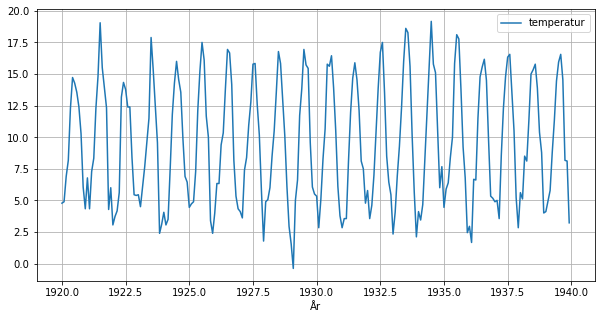

In [9]:

df.plot(x="time", y="temperatur", figsize=(10,5))
plt.xlabel("År")
plt.grid()
plt.show()

### Oppgave

Hva var gjennomsnittstemperaturen i denne perioden? 

### Eksempel 3

På nettsiden seklima.met.no kan du laste ned klima-data for ulike målestasjoner. I dette eksempelet skal vi se på hvor kraftig det blåste i vindkastene i tidsrommet 26.-31. januar 2022. 

![vind-stord](vindkast-stord.png)

Når vi har gjort de ulike valgene for hvilke data vi vil laste ned, så klikker vi på «Last ned» nederst til venstre på nettsiden. Velg csv-fil. Denne blir da lastet ned i din nedlastningsmappe (litt avhengig av nettleser og innstillinger). Pass på å ikke åpne denne filen med Excel. Dra så filen over i mappen som selve jupyter-filen din er lagret i. 

![vindkst-last-ned](last-ned1.png)

Vi kan nå importere denne filen inn i Python, plotte og gjøre beregninger. 

Når vi laster inn denne filen, får vi et par problemer. Vi må for det første spesifisere at verdiene skilles ved hjelp av semikolon. Dette gjør vi ved å skrive inn sep=";". Så får vi et lite problem ved at desimaltallene er gitt med komma, ikke punktum (som er standard i Python). Dette løser vi ved å skrive decimal=",". 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("table.csv", sep=";", decimal=",")
df


,Navn,Stasjon,Tid(norsk normaltid),Høyeste vindkast (10 min)
0,E39 Stordabrua,SN48070,25.01.2022 19:30,5.9
1,E39 Stordabrua,SN48070,25.01.2022 19:40,7.4
2,E39 Stordabrua,SN48070,25.01.2022 19:50,8.2
3,E39 Stordabrua,SN48070,25.01.2022 20:00,9.7
4,E39 Stordabrua,SN48070,25.01.2022 20:10,11.2
...,...,...,...,...
855,E39 Stordabrua,SN48070,31.01.2022 18:30,10.1
856,E39 Stordabrua,SN48070,31.01.2022 18:40,10.1
857,E39 Stordabrua,SN48070,31.01.2022 18:50,12.3
858,E39 Stordabrua,SN48070,31.01.2022 19:00,12.5


Vi ønsker nå å finne ut når vi hadde det høyeste vindkastet. 

In [11]:
m = df["Høyeste vindkast (10 min)"].max()
m

35.0

In [12]:
for i in range(859):
    if df["Høyeste vindkast (10 min)"][i] == m:
        print(df["Tid(norsk normaltid)"][i])


29.01.2022 23:50
30.01.2022 00:00


Vi må selvsagt også plotte dataene våre:

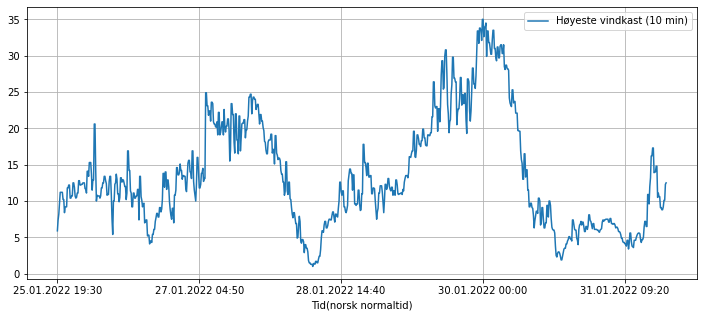

In [14]:
df.plot(x="Tid(norsk normaltid)", y="Høyeste vindkast (10 min)", figsize=(13,5))
plt.grid()
plt.show()